## Random VRPTW Instance Generation and Visualization
This notebook generates random customers with coordinates and time windows, along with a distribution center, and visualizes them using Seaborn.

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set random seed for reproducibility
np.random.seed(42)

In [79]:
# Parameters
n = int(input("Please enter the total number of nodes (n): "))
n_customers = n - 1
x_range = (0, 8)
y_range = (0, 8)
time_range = (0, 10)

# Generate all nodes (Depot + Customers)
nodes = []

# 1. Generate Depot
# Depot has time window covering the whole horizon (effectively no window constraint)
depot_x = int(np.random.randint(x_range[0], x_range[1] + 1))
depot_y = int(np.random.randint(y_range[0], y_range[1] + 1))
nodes.append({
    'id': 0,
    'x': depot_x,
    'y': depot_y,
    'start_time': 0,
    'end_time': time_range[1],
    'type': 'Depot'
})

# 2. Generate Customers
for i in range(1, n_customers + 1):
    x = int(np.random.randint(x_range[0], x_range[1] + 1))
    y = int(np.random.randint(y_range[0], y_range[1] + 1))
    
    # Time window generation
    a = int(np.random.randint(time_range[0], time_range[1]))
    duration = int(np.random.randint(1, 11))
    b = int(min(a + duration, time_range[1]))
    
    nodes.append({
        'id': i,
        'x': x,
        'y': y,
        'start_time': a,
        'end_time': b,
        'type': 'Customer'
    })

# Create DataFrame
df_all = pd.DataFrame(nodes)

print(f"Generated {len(nodes)} nodes (1 Depot + {n_customers} Customers).")
df_all.head()

Generated 6 nodes (1 Depot + 5 Customers).


,id,x,y,start_time,end_time,type
0,0,6,3,0,10,Depot
1,1,7,4,6,10,Customer
2,2,2,6,7,10,Customer
3,3,3,7,7,10,Customer
4,4,5,4,1,9,Customer


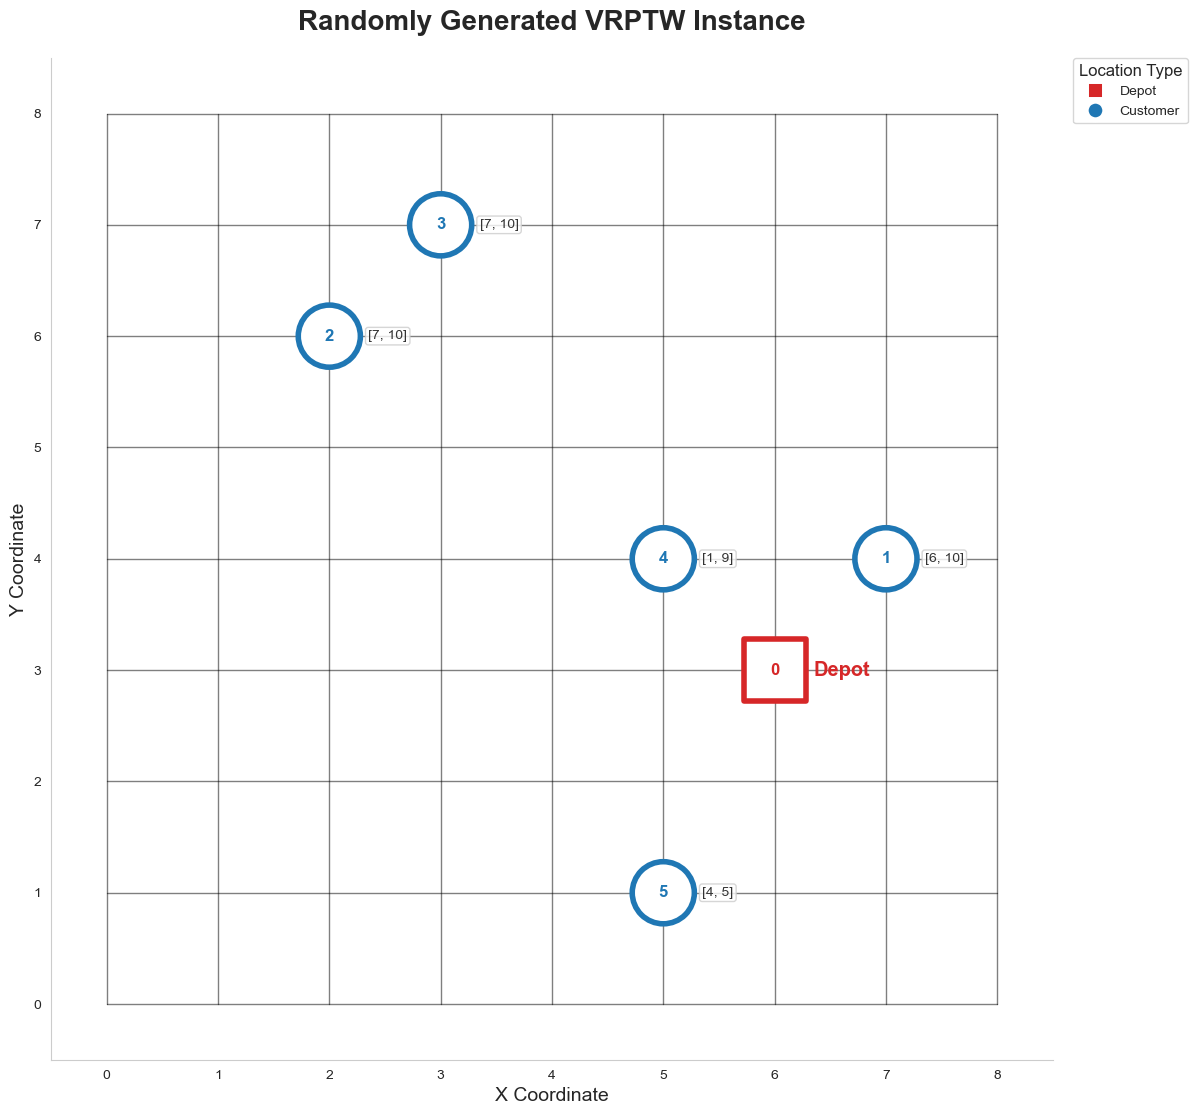

In [83]:
# Visualization
sns.set_style("whitegrid")

# Define colors and markers
palette = {'Depot': '#D62728', 'Customer': '#1F77B4'}
markers = {'Depot': 's', 'Customer': 'o'}

# Create figure using sns FacetGrid approach
fig, ax = plt.subplots(figsize=(12, 12))

# Use seaborn to plot
sns.scatterplot(
    data=df_all, 
    x='x', 
    y='y', 
    hue='type', 
    style='type', 
    s=2000, 
    palette=palette,
    markers=markers,
    zorder=2,
    legend='brief',
    ax=ax
)

# Post-process to make markers hollow and set different line widths
for i, collection in enumerate(ax.collections):
    colors = collection.get_facecolors()
    collection.set_edgecolors(colors)
    collection.set_facecolors('white')
    # Make customer circles (blue) thicker than depot squares
    if i == 1:  # Customer markers (second collection)
        collection.set_linewidth(6)  # Thicker for customers
    else:  # Depot marker (first collection) 
        collection.set_linewidth(4)  # Normal thickness for depot

# Annotate nodes
for i in range(df_all.shape[0]):
    row = df_all.iloc[i]
    color = palette[row['type']]
    
    # 1. Plot ID inside the marker (Center)
    ax.text(
        row['x'], 
        row['y'], 
        str(int(row['id'])), 
        horizontalalignment='center', 
        verticalalignment='center', 
        size='large', 
        color=color, 
        weight='bold',
        zorder=3,
        clip_on=False
    )
    
    # 2. Plot details (Time Window) next to the marker
    if row['type'] == 'Depot':
        ax.text(
            row['x'] + 0.35, 
            row['y'], 
            "Depot", 
            horizontalalignment='left', 
            verticalalignment='center', 
            size='x-large', 
            color=color, 
            weight='bold',
            zorder=3,
            clip_on=False
        )
    else:
        info_text = f"[{int(row['start_time'])}, {int(row['end_time'])}]"
        ax.text(
            row['x'] + 0.35, 
            row['y'], 
            info_text, 
            horizontalalignment='left', 
            verticalalignment='center', 
            size='medium', 
            color='#333333',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='#cccccc', boxstyle='round,pad=0.2'),
            zorder=3,
            clip_on=False
        )

# Beautify the grid and layout
ax.set_title('Randomly Generated VRPTW Instance', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('X Coordinate', fontsize=14)
ax.set_ylabel('Y Coordinate', fontsize=14)

# Expand view range to show full markers
ax.set_xlim(-0.5, 8.5)
ax.set_ylim(-0.5, 8.5)
ax.set_aspect('equal', adjustable='box')

# Customize grid - only draw grid lines from 0 to 8
ax.set_xticks(range(0, 9))
ax.set_yticks(range(0, 9))

# Turn off default grid and manually draw grid lines only within 0-8
ax.grid(False)
for x in range(0, 9):
    ax.axvline(x=x, ymin=0.5/9, ymax=8.5/9, linestyle='-', alpha=0.5, color='black', linewidth=1, zorder=1)
for y in range(0, 9):
    ax.axhline(y=y, xmin=0.5/9, xmax=8.5/9, linestyle='-', alpha=0.5, color='black', linewidth=1, zorder=1)

# Hide the spines (border)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove the MultipleLocator since we manually set ticks

# Move legend outside and remove duplicate entries
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), title='Location Type', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., markerscale=0.3)

fig.tight_layout()
sns.despine(left=False, bottom=False)

# Create plot directory if it doesn't exist
import os
plot_dir = 'plot'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Save the plot
plt.savefig(f'{plot_dir}/vrptw_instance_n{n}.png', dpi=300, bbox_inches='tight')
plt.show()